# Kaggle - Regression - Housing Price Market Predictions

## Jules MOTYL / Sébastien PAVOT

## Libraries:

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

## Data importation:

In [348]:
Data = "C:/Users/jmotyl/Documents/GitHub/Kaggle-Competition-Regression-HousingPriceMarket-Python/Data/"

In [349]:
train = pd.read_csv(Data + "train.csv")

In [350]:
test = pd.read_csv(Data + "test.csv")

#### train set : replacement of missing values

In [351]:
train.shape

(1460, 81)

In [352]:
# here i'm building a table that will display the count of values per variable
#I will use it to identify which variable have missing values and needs attention.
# This does not detect variables that have a majority of 0s however.
counting= pd.DataFrame(columns=["var","cnt"])
var=[]
cnt=[]
for i in list(train.columns):
    var.append(i)
    cnt.append(train[i].count())
counting["var"]=var
counting["cnt"]=cnt

display(counting[counting.cnt<1460]) #those values have at least one missing value
print(counting[counting.cnt<1460].count())

,var,cnt
3,LotFrontage,1201
6,Alley,91
25,MasVnrType,1452
26,MasVnrArea,1452
30,BsmtQual,1423
31,BsmtCond,1423
32,BsmtExposure,1422
33,BsmtFinType1,1423
35,BsmtFinType2,1422
42,Electrical,1459


var    19
cnt    19
dtype: int64


In [353]:
ToReg = np.array(list(counting["var"][counting.cnt<1460]))
ToReg #This is the list of variables that have at least 1 missing

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype='<U12')

In [354]:
train.PoolQC[train["PoolQC"].isnull()]  = "No"
train.Fence[train["Fence"].isnull()]  = "No"
train.Alley[train["Alley"].isnull()]  = "No"
train.MiscFeature[train["MiscFeature"].isnull()]  = "No"
train.FireplaceQu[train.Fireplaces==0] = "No"
train.MasVnrType[train['MasVnrType'].isnull()] = "No"
train.MasVnrArea[train['MasVnrType']==0] = 0

train["IsBasement"] = "NA"
train["IsBasement"][train.BsmtQual.isnull()] = 0
train["IsBasement"][~train.BsmtQual.isnull()] = 1
train["IsGarage"] = "NA"
train["IsGarage"][train.GarageType.isnull()] = 0
train["IsGarage"][~train.GarageType.isnull()] = 1

GarageVar = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
BasementVar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']

for i in GarageVar:
    train[i][train.IsGarage==0] = "No"
for i in BasementVar:
    train[i][train.IsBasement==0] = "No"

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [355]:
display(train[BasementVar][train.BsmtFinType2.isnull()])

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN


In [356]:
train.BsmtExposure[train.BsmtExposure.isnull()] = "No"
train.BsmtFinType2[train.BsmtFinType2.isnull()] = "Unf"
train.Electrical[train.Electrical.isnull()] = "Mix"

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [357]:
display(train[ToReg])

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,No,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,No,Attchd,2003.0,RFn,TA,TA,No,No,No
1,80.0,No,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,No,No,No
2,68.0,No,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,No,No,No
3,60.0,No,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,No,No,No
4,84.0,No,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,No,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,No,No,No
1456,85.0,No,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,No,MnPrv,No
1457,66.0,No,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,No,GdPrv,Shed
1458,68.0,No,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,No,Attchd,1950.0,Unf,TA,TA,No,No,No


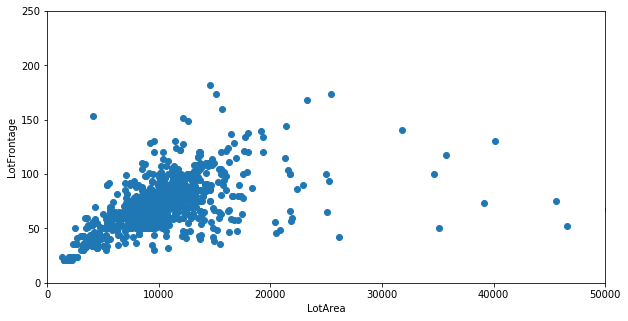

In [358]:
plt.scatter(train.LotArea[~train.LotFrontage.isnull()],train.LotFrontage[~train.LotFrontage.isnull()]) #I want to look at the relation between each variable with missing values
plt.xlabel('LotArea')                     # and the Orientation Economique of the bassin it belongs to
plt.ylabel('LotFrontage')
fig = matplotlib.pyplot.gcf()
axes = plt.gca()
axes.set_xlim([0,50000])
axes.set_ylim([0,250])
fig.set_size_inches(10,5)
plt.show()

In [359]:
SimpleLinearC = LinearRegression().fit(train.LotArea[~train.LotFrontage.isnull()].values.reshape(-1,1),train.LotFrontage[~train.LotFrontage.isnull()].values.reshape(-1,1))

In [360]:
#Getting the coefficients and intercept for every variable
CIntercept = SimpleLinearC.intercept_
CCoefficient = SimpleLinearC.coef_

In [361]:
#replacing the null values in variables by multiplying the population by the corresponding coefficient
train.LotFrontage[train.LotFrontage.isnull()] = np.round(CCoefficient * train.LotArea.values[train.LotFrontage.isnull()],0) + CIntercept

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### test set : replacement of missing values

In [362]:
test.shape

(1459, 80)

In [363]:
# here i'm building a table that will display the count of values per variable
#I will use it to identify which variable have missing values and needs attention.
# This does not detect variables that have a majority of 0s however.
counting= pd.DataFrame(columns=["var","cnt"])
var=[]
cnt=[]
for i in list(test.columns):
    var.append(i)
    cnt.append(test[i].count())
counting["var"]=var
counting["cnt"]=cnt

display(counting[counting.cnt<1459]) #those values have at least one missing value
print(counting[counting.cnt<1459].count())

,var,cnt
2,MSZoning,1455
3,LotFrontage,1232
6,Alley,107
9,Utilities,1457
23,Exterior1st,1458
24,Exterior2nd,1458
25,MasVnrType,1443
26,MasVnrArea,1444
30,BsmtQual,1415
31,BsmtCond,1414


var    33
cnt    33
dtype: int64


In [364]:
ToReg = np.array(list(counting["var"][counting.cnt<1459]))
ToReg #This is the list of variables that have at least 1 missing

array(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType'], dtype='<U12')

In [365]:
#Replacing NAs
test.PoolQC[test["PoolQC"].isnull()]  = "No"
test.Fence[test["Fence"].isnull()]  = "No"
test.Alley[test["Alley"].isnull()]  = "No"
test.MiscFeature[test["MiscFeature"].isnull()]  = "No"
test.FireplaceQu[test.Fireplaces==0] = "No"
test.MasVnrType[test['MasVnrType'].isnull()] = "No"
test.MasVnrArea[test['MasVnrType']==0] = 0

test["IsBasement"] = "NA"
test["IsBasement"][test.BsmtQual.isnull()] = 0
test["IsBasement"][~test.BsmtQual.isnull()] = 1
test["IsGarage"] = "NA"
test["IsGarage"][test.GarageType.isnull()] = 0
test["IsGarage"][~test.GarageType.isnull()] = 1

GarageVar = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
BasementVar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']

for i in GarageVar:
    test[i][test.IsGarage==0] = "No"
for i in BasementVar:
    test[i][test.IsBasement==0] = "No"

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/us

In [366]:
# here i'm building a table that will display the count of values per variable
#I will use it to identify which variable have missing values and needs attention.
# This does not detect variables that have a majority of 0s however.
counting= pd.DataFrame(columns=["var","cnt"])
var=[]
cnt=[]
for i in list(test.columns):
    var.append(i)
    cnt.append(test[i].count())
counting["var"]=var
counting["cnt"]=cnt

display(counting[counting.cnt<1459]) #those values have at least one missing value
print(counting[counting.cnt<1459].count())

,var,cnt
2,MSZoning,1455
3,LotFrontage,1232
9,Utilities,1457
23,Exterior1st,1458
24,Exterior2nd,1458
26,MasVnrArea,1444
31,BsmtCond,1456
32,BsmtExposure,1457
34,BsmtFinSF1,1458
36,BsmtFinSF2,1458


var    23
cnt    23
dtype: int64


In [367]:
ToReg = np.array(list(counting["var"][counting.cnt<1459]))
ToReg #This is the list of variables that have at least 1 missing

array(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'], dtype='<U12')

In [368]:
#replacing the null values in variables by multiplying the population by the corresponding coefficient
test.LotFrontage[test.LotFrontage.isnull()] = np.round(CCoefficient * test.LotArea.values[test.LotFrontage.isnull()],0) + CIntercept

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [369]:
test[GarageVar][test.GarageFinish.isnull()]

,GarageType,GarageFinish,GarageQual,GarageCond
666,Detchd,NaN,NaN,NaN
1116,Detchd,NaN,NaN,NaN


In [370]:
pd.unique(test.GarageFinish)

array(['Unf', 'Fin', 'RFn', 'No', nan], dtype=object)

In [371]:
test.GarageFinish[test.GarageFinish.isnull()] = "Fin"
test.GarageQual[test.GarageQual.isnull()] = "TA"
test.GarageCond[test.GarageCond.isnull()] = "TA"

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [372]:
test.MasVnrType[test.MasVnrArea.isnull()]

231     No
246     No
422     No
532     No
544     No
581     No
851     No
865     No
880     No
889     No
908     No
1132    No
1197    No
1226    No
1402    No
Name: MasVnrType, dtype: object

In [373]:
test.MasVnrArea[test.MasVnrArea.isnull()] = 0

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
np.sort(pd.unique(test.GarageYrBlt))

array([1895., 1896., 1900., 1910., 1915., 1916., 1917., 1918., 1919.,
       1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928.,
       1930., 1932., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2207.,   nan])

In [375]:
test.GarageYrBlt[test.GarageYrBlt==2207] = 2007 #Regularizing obvious outlier
test.GarageYrBlt[test.GarageYrBlt.isnull()] = test.GarageYrBlt.mean()

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [376]:
test.BsmtCond[test.BsmtCond.isnull()] = "TA"
test.BsmtExposure[test.BsmtExposure.isnull()] = "Av"
test.BsmtFinSF1[test.BsmtFinSF1.isnull()] = 0
test.BsmtFinSF2[test.BsmtFinSF2.isnull()] = 0
test.BsmtHalfBath[test.BsmtHalfBath.isnull()] = 0
test.BsmtUnfSF[test.BsmtUnfSF.isnull()] = 0
test.BsmtFullBath[test.BsmtFullBath.isnull()] = 0

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [377]:
test.GarageCars[test.GarageCars.isnull()] = test.GarageCars.mean()
test.GarageArea[test.GarageArea.isnull()] = test.GarageArea.mean()

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [378]:
test.MSZoning[test.MSZoning.isnull()] ='C (all)'
test.Utilities[test.Utilities.isnull()] ='AllPub'
test.Exterior1st[test.Exterior1st.isnull()] ='Other'
test.Exterior2nd[test.Exterior2nd.isnull()] ='Other'
test.TotalBsmtSF[test.TotalBsmtSF.isnull()] = test.TotalBsmtSF.mean()
test.KitchenQual[test.KitchenQual.isnull()] ='TA'
test.Functional[test.Functional.isnull()] ='Typ'
test.SaleType[test.SaleType.isnull()] ='Oth'

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [379]:
# here i'm building a table that will display the count of values per variable
#I will use it to identify which variable have missing values and needs attention.
# This does not detect variables that have a majority of 0s however.
counting= pd.DataFrame(columns=["var","cnt"])
var=[]
cnt=[]
for i in list(test.columns):
    var.append(i)
    cnt.append(test[i].count())
counting["var"]=var
counting["cnt"]=cnt

display(counting[counting.cnt<1459]) #those values have at least one missing value
print(counting[counting.cnt<1459].count())

,var,cnt


var    0
cnt    0
dtype: int64


In [ ]:
#No variable has null value anymore.

We create a full dataset by stacking train & test data, this dataset will be used to process the data and after we will divide it again into train and test set:

In [30]:
full = all_data = pd.concat((train, test)).reset_index(drop=True)
full = full.drop(['SalePrice'], axis =1)
full.shape

C:\Users\jmotyl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 80)

Now that we've cleaned and preprocessed the data, we divide the full dataset into the train and test previously loaded:

In [31]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

## Part 1: Data exploration:

### Analyze the dependent variable : SalePrice

In [25]:
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [24]:
#descriptive statistics summary
train['SalePrice'].describe()

KeyError: 'SalePrice'

In [16]:
#Histogram vizualisation
sns.distplot(train['SalePrice']);

KeyError: 'SalePrice'

In [ ]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We can see that the SalePrice variable is right skewed meaning that we will found a small amount of house that have a price way higher than the median.

We can see that it's not normally distributed, here we would like to get a normal distribution.

Now, we check the 11 variables that are the most correlated with SalePrice using the corr() function. Let's print it in a heatmap using seaborn in order to have a good vizualisation:

In [ ]:
#saleprice correlation matrix
corrmat = train.corr()
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.50)
fig, ax = plt.subplots(figsize=(12,12))  
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

As example, we can see that SalePrice and GarageCars are correlated but GarageCar is nearly strongly correlated with OverallQual. Here the size of the garage seems to be correlated with the overall quality of the material and the finish of the house. It's seems to be logical but we can maybe find stronger correlation between OverallQual and GarageQual as the garage quality will definitely have an impact on the overall quality.

The eleven most correlated variable with SalePrice are:
 * OverallQual
 * GrLivArea
 * GarageCars
 * GarageArea
 * TotalBsmtSF
 * 1stFlrSF
 * FullBath
 * TotRmsAbvGrd
 * YearBuilt
 * YearRemodAdd

Now that we've more comprehension of the dependent variable, let's have a first look at the predictors:

### Analyze the predictors:

Bellow, we plot a correlation heatmap using once again seaborn in order to have a quick overall ideal of correlation between all the variables:

In [ ]:
corrmat = train.corr()
sns.set(font_scale= 1.2)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels=True, yticklabels=True);

We've now an overview of the correlation, as a macro view, we can say that some variables are correlated together wether negatively or positvely. This fact might lead to multicolinearity in our modeling part so we have to take this into account and to avoid that in order to have a better model. One can enjoy spend time of looking at correlation for each predictor but we won't dig into details here.

### Missing value analysis:

We will first create a dataframe containing the missing ratio (in percentage) of all predictors containing missing values:

In [ ]:
#the dataset:
full_na = (full.isnull().sum() / len(all_data)) * 100
#We now remove the obervations where there's no missing values and sort it descennding
full_na = full_na.drop(full_na[full_na == 0].index).sort_values(ascending=False)

In [ ]:
#We create a varibale containing the percentage of missing values by diving the sum of missing values by the length of 
#the dataset:
full_na = (full.isnull().sum() / len(all_data)) * 100
#We now remove the obervations where there's no missing values and sort it descennding
full_na = full_na.drop(full_na[full_na == 0].index).sort_values(ascending=False)
#We name this column and turn the full_na into a dataframe and then print it:
missing_data = pd.DataFrame({'Missing Ratio' :full_na})
missing_data

We now plot this into an horizontal barchart for more visualization:

In [ ]:
#Adapt the size of the plot
fig, ax = plt.subplots(figsize=(12,12))
#Plot the barplot
sns.barplot(x = full_na, y = full_na.index)
#Add labels
plt.xlabel("Missing values percentages")
plt.title("Percentages of missing values per features")

### Outliers analysis:

The dataset descriptions give us the following about outliers: _"Potential Pitfalls (Outliers): Although all known errors were corrected in the data, no
observations have been removed due to unusual values and all final residential sales
from the initial data set are included in the data presented with this article. There are
five observations that an instructor may wish to remove from the data set before giving
it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these
points). Three of them are true outliers (Partial Sales that likely don’t represent actual
market values) and two of them are simply unusual sales (very large houses priced
relatively appropriately). I would recommend removing any houses with more than
4000 square feet from the data set (which eliminates these five unusual observations)
before assigning it to students."_

Let's plot SalePrice versus GR LIV AREA:

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Part 2: Data Processing:

### Outliers detection and treatment:

In [33]:
train = full[:ntrain]
test = full[ntrain:]